In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack
from scipy import signal
import numpy as np
import pandas as pd
import datetime
import prettyplotlib as ppl

In [3]:
cd ~/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL/

/home/takeyama/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL


In [4]:
left_hand = pd.read_csv('Cleaning-Conv-left-hand-ags.csv',parse_dates=['Time'])
#left_hand.Time=pd.to_timedelta(left_hand.Time)
left_leg = pd.read_csv('Cleaning-Conv-left-leg-ags.csv',parse_dates=['Time'])
#left_leg.Time=pd.to_timedelta(left_leg.Time)
right_hand = pd.read_csv('Cleaning-Conv-right-hand-ags.csv',parse_dates=['Time'])
#right_hand.Time=pd.to_timedelta(right_hand.Time)
right_leg = pd.read_csv('Cleaning-Conv-right-leg-ags.csv',parse_dates=['Time'])
#right_leg.Time=pd.to_timedelta(right_leg.Time)
west = pd.read_csv('Cleaning-Conv-west-ags.csv',parse_dates=['Time'])
#west.Time=pd.to_timedelta(west.Time)

name=['Cleaning-Conv-left-hand-ags.csv','Cleaning-Conv-left-leg-ags.csv','Cleaning-Conv-right-hand-ags.csv',\
     'Cleaning-Conv-right-leg-ags.csv','Cleaning-Conv-west-ags.csv']

In [5]:
# labering data -> pandas dateframe
# freq -> sampling time [seconds]
# overlap -> % to freq
def sliding_window(labeling_data,freq, overlap):
    
    count =0
    start =labeling_data.Time[0]
    goal = start+datetime.timedelta(seconds=freq)
    add=freq*overlap
    yield labeling_data[(start <= labeling_data.Time) &(labeling_data.Time <= goal)]
       
    while True:
        try:
            count +=1
            start =start+datetime.timedelta(seconds=add)
            goal  =start+datetime.timedelta(seconds=freq)
            #print goal
            yield labeling_data[(start <= labeling_data.Time) &(labeling_data.Time <= goal)]
        except StopIteration:
            break

In [44]:
def Get_MultiIndex(sample_num):
    if sample_num==16:
        
    elif sample_num==32:
        
    elif sample_num==64:
        
    elif sample_num==128:

    elif sample_num==256:
        
    elif sample_num==512:

IndentationError: expected an indented block (<ipython-input-44-6cf03feeb394>, line 4)

In [28]:
sample=[16,32,64,128,256,512]

lAccX=[]
lAccY=[]
lAccZ=[]
lGyrX=[]
lGyrY=[]
lGyrZ=[]
time=[]

for samp in sample:
    freq=samp*0.01
    for i in name:
        Source=pd.read_csv(i,parse_dates=['Time'])
        df=sliding_window(Source,freq,0.5)

        while True:
            try:
                d=df.next()
                # fftの直流成分を除くsample/2のみ
                lAccX.append(fftpack.fft(d.AccX)[1:samp/2-1])
                lAccY.append(fftpack.fft(d.AccY)[1:samp/2-1])
                lAccZ.append(fftpack.fft(d.AccZ)[1:samp/2-1])
                lGyrX.append(fftpack.fft(d.GyrX)[1:samp/2-1])
                lGyrY.append(fftpack.fft(d.GyrY)[1:samp/2-1])
                lGyrZ.append(fftpack.fft(d.GyrZ)[1:samp/2-1])
                time.append( min(d.Time) )
            except ValueError:
                break
        
        lAccX=np.array(lAccX,dtype=np.complex)
        lAccY=np.array(lAccY,dtype=np.complex)
        lAccZ=np.array(lAccZ,dtype=np.complex)
        lGyrX=np.array(lGyrX,dtype=np.complex)
        lGyrY=np.array(lGyrY,dtype=np.complex)
        lGyrZ=np.array(lGyrZ,dtype=np.complex)
        
        
        fftdf=pd.DataFrame({
                'Time':time[:4096],
                'AccX':lAccX[:4096,:],
                'AccY':lAccZ[:4096,:],
                'AccZ':lAccZ[:4096,:],
                'GyrX':lGyrX[:4096,:],
                'GyrY':lGyrY[:4096,:],
                'GyrZ':lGyrZ[:4096,:]},
                columns=[range(samp/2-2)])
        fftdf.to_csv("FFT-"+i+"-"+str(samp)+"bit-samp-.csv")
       
        fftdf_real=pd.DataFrame(
            {'Time':time[:4096],
             'AccX':np.real(fftdf.AccX),
            'AccY':np.real(fftdf.AccY),
            'AccZ':np.real(fftdf.AccZ),
            'GyrX':np.real(fftdf.GyrX),
            'GyrY':np.real(fftdf.GyrY),
            'GyrZ':np.real(fftdf.GyrZ)},
             index=['Time'])
        fftdf_real.to_csv("FFT-"+i+"-"+str(samp)+"bit-samp-real.csv")
        
        fftdf_image=pd.DataFrame({
            'Time':time[:4096],
            'AccX':np.imag(fftdf.lAccX),
            'AccY':np.imag(fftdf.lAccY),
            'AccZ':np.imag(fftdf.lAccZ),
            'GyrX':np.imag(fftdf.lGyrX),
            'GyrY':np.imag(fftdf.lGyrY),
            'GyrZ':np.imag(fftdf.lGyrZ)},
             index=['Time'])
        fftdf_image.to_csv("FFT-"+i+"-"+str(samp)+"bit-samp-image.csv")

AttributeError: 'DataFrame' object has no attribute 'AccX'

In [185]:

Source=pd.read_csv(name[0],parse_dates=['Time'])
df=sliding_window(Source,0.16,0.5)
lAccX=[]
lAccY=[]
lAccZ=[]
lGyrX=[]
lGyrY=[]
lGyrZ=[]
time=[]
samp=16

while True:
    try:
        d=df.next()
        # fftの直流成分を除くsample/2のみ
        lAccX.append(fftpack.fft(d.AccX)[1:samp/2-1])
        lAccY.append(fftpack.fft(d.AccY)[1:samp/2-1])
        lAccZ.append(fftpack.fft(d.AccZ)[1:samp/2-1])
        lGyrX.append(fftpack.fft(d.GyrX)[1:samp/2-1])
        lGyrY.append(fftpack.fft(d.GyrY)[1:samp/2-1])
        lGyrZ.append(fftpack.fft(d.GyrZ)[1:samp/2-1])
        time.append( min(d.Time) )
    except ValueError:
        break

lAccX=np.array(lAccX,dtype=np.complex)
lAccY=np.array(lAccY,dtype=np.complex)
lAccZ=np.array(lAccZ,dtype=np.complex)
lGyrX=np.array(lGyrX,dtype=np.complex)
lGyrY=np.array(lGyrY,dtype=np.complex)
lGyrZ=np.array(lGyrZ,dtype=np.complex)
time=np.array(time,dtype=np.datetime64)

arrays1=[['AccX','AccX','AccX','AccX','AccX','AccX',
         'AccY','AccY','AccY','AccY','AccY','AccY',
         'AccZ','AccZ','AccZ','AccZ','AccZ','AccZ',
         'GyrX','GyrX','GyrX','GyrX','GyrX','GyrX',
         'GyrY','GyrY','GyrY','GyrY','GyrY','GyrY',
         'GyrZ','GyrZ','GyrZ','GyrZ','GyrZ','GyrZ',],
        ['1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',]]

arrays2=[['time','time','time','time','time','time'],
        ['1st','2nd','3rd','4th','5th','6th']]

array =  ['1st','2nd','3rd','4th','5th','6th']

TimeArray=[]
LabelArray=[]

for t in range(len(time)):
    for i in range(len(array)):
        TimeArray.append(str(t))
        

for i in range(len(time)):
    for a in array:
        LabelArray.append(a)
        
TimeArray=np.array(TimeArray)
LabelArray=np.array(LabelArray)
        
ArrayCol=np.vstack( (t,a) )
columns= pd.MultiIndex.from_arrays(ArrayCol, names=['DataName', 'Number'])

AccX_real = np.real(lAccX)
AccY_real = np.real(lAccY)
AccZ_real = np.real(lAccZ)
GyrX_real = np.real(lGyrX)
GyrY_real = np.real(lGyrY)
GyrZ_real = np.real(lGyrZ)
AccX_imag = np.imag(lAccX)
AccY_imag = np.imag(lAccY)
AccZ_imag = np.imag(lAccZ)
GyrX_imag = np.imag(lGyrX)
GyrY_imag = np.imag(lGyrY)
GyrZ_imag = np.imag(lGyrZ)

fftdf=pd.DataFrame({
        'AccX_real':AccX_real,
        'AccY_real':AccY_real,
        'AccZ_real':AccZ_real,
        'GyrX_real':GyrX_real,
        'GyrY_real':GyrY_real,
        'GyrZ_real':GyrZ_real,
        'AccX_imag':AccX_imag[0,:],
        'AccY_imag':AccY_imag[0,:],
        'AccZ_imag':AccZ_imag[0,:],
        'GyrX_imag':GyrX_imag[0,:],
        'GyrY_imag':GyrY_imag[0,:],
        'GyrZ_imag':GyrZ_imag[0,:]
        },columns=columns
      )

#fftdf = fftdf.astype(np.float64)

fftdf


DataName,6933
Number,6th


In [186]:
TimeArray[0:11]

array(['0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1'], 
      dtype='|S4')

In [187]:
LabelArray[0:11]

array(['1st', '2nd', '3rd', '4th', '5th', '6th', '1st', '2nd', '3rd',
       '4th', '5th'], 
      dtype='|S3')

In [188]:
ArrayCol

array([['6933'],
       ['6th']], 
      dtype='|S21')

In [179]:
columns

MultiIndex(levels=[[u'6933'], [u'6th']],
           labels=[[0], [0]],
           names=[u'DataName', u'Number'])

In [119]:
AccX_imag[0]

array([-0.01519195, -0.10396996, -0.10452798, -0.07505361, -0.04416239,
        0.00862261])

In [94]:
test=np.real(lAccX)

In [95]:
test.dtype

dtype('float64')

In [131]:
i

array(6934)

In [74]:
lAccX.shape

(6934, 6)

In [24]:
lAccX=np.array(lAccX,dtype=np.complex)

In [55]:
lAccX[0].shape

(6,)

In [69]:
arrays=[['AccX','AccX','AccX','AccX','AccX','AccX',
         'AccY','AccY','AccY','AccY','AccY','AccY',
         'AccZ','AccZ','AccZ','AccZ','AccZ','AccZ',
         'GyrX','GyrX','GyrX','GyrX','GyrX','GyrX',
         'GyrY','GyrY','GyrY','GyrY','GyrY','GyrY',
         'GyrZ','GyrZ','GyrZ','GyrZ','GyrZ','GyrZ',],
        ['1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',
         '1st','2nd','3rd','4th','5th','6th',]]

In [65]:
arrays=[['time','time','time','time','time','time'],
        ['1st','2nd','3rd','4th','5th','6th']]

In [70]:
index = pd.MultiIndex.from_arrays(arrays, names=['DataName', 'Namber'])

In [71]:
df = pd.DataFrame(np.random.randn(2, 36), columns=index)

In [72]:
df

DataName      AccX                                                    \
Namber         1st       2nd       3rd       4th       5th       6th   
0        -0.137268  1.903465  0.726928  0.537887  1.744202  0.603453   
1        -1.214001 -0.717530  0.811779 -0.369269  1.870385  1.238480   

DataName      AccY                                  ...         GyrY  \
Namber         1st       2nd       3rd       4th    ...          3rd   
0        -0.093335 -1.033839 -1.102219  0.495619    ...     0.765002   
1        -0.122354 -0.042798  0.220465  0.862618    ...     0.205825   

DataName                                    GyrZ                      \
Namber         4th       5th       6th       1st       2nd       3rd   
0        -1.006274 -1.304457 -0.143454 -0.525762  0.334712 -0.385216   
1        -0.947922 -0.178218  2.541736 -0.709699 -0.461351  0.352766   

DataName                                
Namber         4th       5th       6th  
0        -0.788301 -0.736256 -1.189516  
1        -0.126579  0.612695  1.776302  

[2 rows x 36 columns]

In [12]:
len(lGyrX)

6934

In [66]:
Source.Time

0       2016-04-21 18:06:15.696
1       2016-04-21 18:06:15.706
2       2016-04-21 18:06:15.716
3       2016-04-21 18:06:15.726
4       2016-04-21 18:06:15.736
5       2016-04-21 18:06:15.746
6       2016-04-21 18:06:15.756
7       2016-04-21 18:06:15.766
8       2016-04-21 18:06:15.776
9       2016-04-21 18:06:15.786
10      2016-04-21 18:06:15.796
11      2016-04-21 18:06:15.806
12      2016-04-21 18:06:15.816
13      2016-04-21 18:06:15.826
14      2016-04-21 18:06:15.836
15      2016-04-21 18:06:15.846
16      2016-04-21 18:06:15.856
17      2016-04-21 18:06:15.866
18      2016-04-21 18:06:15.876
19      2016-04-21 18:06:15.886
20      2016-04-21 18:06:15.896
21      2016-04-21 18:06:15.906
22      2016-04-21 18:06:15.916
23      2016-04-21 18:06:15.926
24      2016-04-21 18:06:15.936
25      2016-04-21 18:06:15.946
26      2016-04-21 18:06:15.956
27      2016-04-21 18:06:15.966
28      2016-04-21 18:06:15.976
29      2016-04-21 18:06:15.986
                  ...          
55441   

In [16]:
Power=[]
for i in range(len(fftdf.AccX)):
    Power.append( np.real(fftdf.AccX[i])**2+np.imag(fftdf.AccX[i])**2 )
Bpower=Power
PowerAccX=np.array(Power)

In [17]:
PowerAccX.shape

(217,)

In [19]:
PowerAccX=PowerAccX[:128]

In [210]:
PowerAccX*255/PowerAccX.max()

array([[  3.30642865e-02,   5.08286394e-03,   3.69074777e-03,
          1.45336259e-03,   6.30537376e-04,   9.22461323e-05],
       [  1.34964174e-01,   2.53706397e-03,   1.08156797e-03,
          1.18412254e-03,   1.19456737e-03,   2.15795528e-03],
       [  2.96046449e-01,   9.53607793e-02,   3.82768583e-02,
          2.22085648e-02,   1.78234269e-02,   1.31702913e-02],
       ..., 
       [  9.76643615e-02,   2.92767842e-03,   4.71115596e-03,
          3.26446848e-03,   3.49531078e-03,   3.02721075e-03],
       [  1.40640729e-02,   2.30345284e-03,   8.94682741e-04,
          7.93265804e-04,   3.54009778e-04,   8.21492398e-05],
       [  1.62664844e-03,   1.83309741e-04,   3.27941320e-04,
          3.27941320e-04,   1.83309741e-04,   1.62664844e-03]])

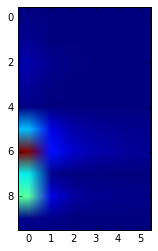

In [218]:
plt.imshow(PowerAccX[:10])

In [160]:
Power=Power[:6930]
Power.reshape(1155,6)

array([[ array([ 0.12796533-0.0108788j , -0.00187686+0.01965323j,
       -0.00751675-0.0122067j , -0.00562100+0.00052099j,
       -0.00145153-0.00197261j,  0.00020960+0.0002906j ]),
        array([-0.27626409+0.44551889j, -0.00881100-0.00441302j,
        0.00040097-0.0041818j , -0.00252780-0.00384239j,
        0.00253986-0.003883j  ,  0.00538946-0.00641942j]),
        array([-1.12811164-0.22274207j, -0.19561807-0.31452668j,
       -0.10048998-0.10956978j, -0.01712109-0.08454542j,
        0.01927312-0.06649213j,  0.02485208-0.04471307j]),
        array([-0.39171948-0.64960276j, -0.13027226-0.16325784j,
       -0.02929335-0.10089662j, -0.01033768-0.05312074j,
        0.01646106-0.03190393j,  0.01676651-0.02138858j]),
        array([ 0.12342319+0.30907486j, -0.04557542+0.00600383j,
       -0.02754596-0.01253449j, -0.00170750-0.01149682j,
       -0.00095122-0.009481j  ,  0.00309935-0.00713618j]),
        array([-7.85266778+4.09027979j, -2.33035995-0.90409457j,
       -0.67033442-0.84183945